# DL Learn
Deep learning with numpy

this notebook is based on &lt;Deep Learning from scratch&gt; by Saito Goki.\
but all codes are heavly modified for easy understanding. Thanks to O'reilly

(c) Minhyeok Park. 2024. All rights reserved.

In [124]:
%pip install -r requirements.txt


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## 퍼셉트론
딥러닝, 신경망에서 우리가 생각할 수 있는 가장 최소 단위의 함수를 퍼셉트론(단일 퍼셉트론)이라 한다

퍼셉트론은 다음과 같은 간단한 함수이며 여러 데이터 값을 받아 하나의 출력을 하는 함수로 인간의 뇌에서 신경 세포와 비슷한 구조를 가진다.

```
y={0 (w1*x1+w2*x2 <= θ)}
  {1 (w1*x1+w2*x2 > θ)}
```

받은 백터 x에 각각 일치하는 가중치 w를 곱한 후 해당 값이 특정 임계값 θ를 넘어가면 0, 아니면 1을 출력한다 \
파이썬으로 작성하면 다음과 같다:

In [125]:
def perceptron_1 (x1, x2):
  w1, w2, theta = a, b, c # type: ignore

  if x1*w1 + x2*w2 <= theta:
    return 0
  else:
    return 1

우리는 이때 가중치 w와 임계값 θ를 잘 활용하면 여러 함수들을 만들 수 있게 된다. \
다음은 AND 연산을 해주는 퍼셉트론이다.

In [126]:
def and_perceptron (x1, x2):
  w1, w2, theta = 0.5, 0.5, 0.7

  if x1*w1 + x2*w2 <= theta:
    return 0
  else:
    return 1
  
print('0 AND 0 =', and_perceptron(0, 0))
print('1 AND 0 =', and_perceptron(1, 0))
print('0 AND 1 =', and_perceptron(0, 1))
print('1 AND 1 =', and_perceptron(1, 1))

0 AND 0 = 0
1 AND 0 = 0
0 AND 1 = 0
1 AND 1 = 1


이 퍼셉트론을 쫌 더 재밌게 만들어 보자. \
앞서 봤던 퍼셉트론의 `(w1*x1+w2*x2 <= θ)` 부분을 다음과 같이 표현할 수 있다.


```
y={0 (w1*x1+w2*x2+b <= 0)}
  {1 (w1*x1+w2*x2+b > 0)}
```

부등호 뒤에 있던 임계값 θ를 앞으로 옮겼을 뿐이다. 이제 우리는 그것을 편향 b라고 부른다.\
당연히 b 값은 이제 부호를 반대로 하여 주어야 한다.

개선된 식으로 가독성 높은 코드와 빠른 속도를 위해 numpy 라이브러리를 통해 AND, NAND, OR 게이트를 만들어 보자.

In [127]:
import numpy as np

def and_perceptron2 (x: np.ndarray):
  w = np.array([0.5, 0.5])
  b = -0.7

  if np.sum(w*x) + b <= 0:
    return 0
  else:
    return 1
  
print('0 AND 0 =', and_perceptron2(np.array([0, 0])))
print('1 AND 0 =', and_perceptron2(np.array([1, 0])))
print('0 AND 1 =', and_perceptron2(np.array([0, 1])))
print('1 AND 1 =', and_perceptron2(np.array([1, 1])))

0 AND 0 = 0
1 AND 0 = 0
0 AND 1 = 0
1 AND 1 = 1


In [128]:
def nand_perceptron (x: np.ndarray):
  w = np.array([-0.5, -0.5])
  b = 0.7

  if np.sum(w*x) + b <= 0:
    return 0
  else:
    return 1
  
print('0 NAND 0 =', nand_perceptron(np.array([0, 0])))
print('1 NAND 0 =', nand_perceptron(np.array([1, 0])))
print('0 NAND 1 =', nand_perceptron(np.array([0, 1])))
print('1 NAND 1 =', nand_perceptron(np.array([1, 1])))

0 NAND 0 = 1
1 NAND 0 = 1
0 NAND 1 = 1
1 NAND 1 = 0


In [129]:
def or_perceptron (x: np.ndarray):
  w = np.array([0.5, 0.5])
  b = -0.2

  if np.sum(w*x) + b <= 0:
    return 0
  else:
    return 1
  
print('0 OR 0 =', or_perceptron(np.array([0, 0])))
print('1 OR 0 =', or_perceptron(np.array([1, 0])))
print('0 OR 1 =', or_perceptron(np.array([0, 1])))
print('1 OR 1 =', or_perceptron(np.array([1, 1])))

0 OR 0 = 0
1 OR 0 = 1
0 OR 1 = 1
1 OR 1 = 1


이렇게 AND, NAND, OR 게이트를 퍼셉트론을 통해 구현할 수 있다.

이처럼 함수의 수정 없이 가중치 w와 편향 b만을 수정하기만 하면 여러 상황들을 만들어 낼 수 있는 것이 퍼셉트론의 장점이다.

### 다층 퍼셉트론
퍼셉트론 하나만으론 XOR 게이트를 구현할 수 없다.

퍼셉트론은 x{1}과 x{2}의 축을 가진 그래프에서 가상의 직선을 하나 그어 0과 1 값을 구분하는 함수이다. \
하지만 XOR은 직선 하나만으로 구분할 수 없고 (즉 선형으로는 해결할 수 없고) \
직선이 아닌 선으로 (비선형으로) 그어야 구분할 수 있다.

이 비선형 구분을 하는 XOR 게이트와 같은 알고리즘은 여러 퍼셉트론을 결합하여 구현할 수 있다. \
마치 AND, NAND, OR 게이트로 XOR 게이트를 만들 수 있는 것 처럼 말이다.

In [130]:
def xor_perceptron(x: np.ndarray):
  y = np.array([nand_perceptron(x), or_perceptron(x)])
  return and_perceptron2(y)


print('0 XOR 0 =', xor_perceptron(np.array([0, 0])))
print('1 XOR 0 =', xor_perceptron(np.array([1, 0])))
print('0 XOR 1 =', xor_perceptron(np.array([0, 1])))
print('1 XOR 1 =', xor_perceptron(np.array([1, 1])))

0 XOR 0 = 0
1 XOR 0 = 1
0 XOR 1 = 1
1 XOR 1 = 0


XOR을 구현하는 이 다층 퍼셉트론은 2개의 층으로 구성되어 있다.

1층: NAND 퍼셉트론과 OR 퍼셉트론이 있는 층 \
2층: AND 퍼셉트론이 있는 층

이렇게 2층을 쌓는 것 만으로도 기존 단일 퍼셉트론으론 할 수 없었던 연산을 가능하게 되었다!\
이 뜻은 퍼셉트론을 여러겹 쌓게 되면 선형적 표현을 넘어서 비선형적 표현도 가능하다는 의미이다.

실제로 이것을 응용하면 인간이 생각할 수 있는 모든 회로를 단 2층의 퍼셉트론으로 모두 구현할 수 있다. (w와 b를 찾는게 매우 어렵겠지만)

## 신경망
위 퍼셉트론에서 문제점이 무엇일까? 바로 사람이 직접 w와 b를 찾아줘야 했던 점이다. \
신경망은 퍼셉트론에 더 많은 기능을 추가하여 자동으로 w와 b를 찾아주는 기능을 구현한다.

아까 구현했던 XOR 회로를 기준으로 신경망의 층을 나눠보자.

입력층: 입력받았던 x가 있는 층 \
은닉층 1층: NAND와 OR 퍼셉트론이 있던 층 \
출력층: AND 퍼셉트론이 있던 층

신경망에서 입력을 받는 층을 입력층, 내부적인 처리를 하는 은닉층, 최종적으로 결과를 계산하는 출력층이 존재한다. \
이때 입력층을 포함해서 3개니까 3층 신경망이 아니냐고 예기를 할 수 있겠지만 w와 b를 계산하지 않는 입력층은 포함되지 않아 2층 신경망이라고 한다.

### 활성화 함수
이제 전의 퍼셉트론 함수를 쫌 더 재미있게 만들어 보자 \
`y={0 (w1*x1+w2*x2+b <= 0)}` 에서 결과 값이 0보다 큰지 작은지 체크하는 부분을 따로 때어 보는것이다.

```
y=h(b+w1*x1+w2+x2)
h={0 (x <= 0)}
  {1 (x > 0) }
```

`b+w1*x1+w2+x2` 의 내용이 0보다 큰지 작은지를 계산하는 부분을 함수 h로 때어내었다.\
이때 이 함수 h는 활성화 함수라고 부른다.

구현한 코드를 보면 더 쉽게 이해할 수 있다.

In [131]:
def h1(x):
  if x <= 0:
    return 0
  else:
    return 1

# numpy를 사용해 배열도 지원하고 짧게 구현해보자
def h2(x: np.ndarray):
  y = x > 0 # 입력받은 배열 x의 모든 값을 0과 비교하고 True, False로 반환한다

  return y.astype(int) # boolean을 0과 1로 변환한다.

# 더 짧게 구현할 수 있다.
def h3(x: np.ndarray):
  return np.array(x > 0, dtype=int)

def and_perceptron3 (x: np.ndarray):
  w = np.array([0.5, 0.5])
  b = -0.7
  y = h3(np.array([np.sum(w*x) + b]))

  return y
  
print('0 AND 0 =', and_perceptron2(np.array([0, 0])))
print('1 AND 0 =', and_perceptron2(np.array([1, 0])))
print('0 AND 1 =', and_perceptron2(np.array([0, 1])))
print('1 AND 1 =', and_perceptron2(np.array([1, 1])))

0 AND 0 = 0
1 AND 0 = 0
0 AND 1 = 0
1 AND 1 = 1


이 활성화 함수의 분리 여부는 퍼셉트론이 신경망으로 진화하는데 큰 역할을 한다.

왜냐면 0과 1을 리턴했던 재미없는 함수(계단 함수) h를 재미있게 수정할 수 있기 때문이다! \
일단 먼저 이때까지 사용했던 계단 함수를 그래프를 통해 확인해보자.

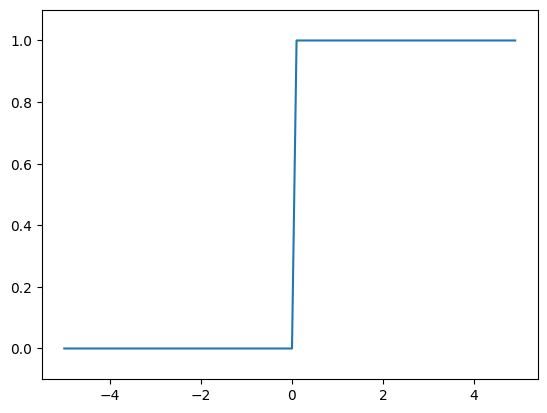

In [132]:
import matplotlib.pyplot as plt

x = np.arange(-5.0, 5.0, 0.1)
y = h3(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

이렇게 재미없는 선형 함수를 활성화 함수로 하게 되면 신경망의 이점을 얻을 수 없다.

마치 `h=cx`로 함수를 만들고 `y=h(h(h(x)))` 라고 한다면 굳이 저렇게 적지 말고 `y=ax, a=c^3` 이라고만 하면 되는 것 처럼 \
중첩의 의미를 가질 수 없게 되어 쓰는 의미가 없어지기 때문이다.

그럼 비선형적 함수를 한번 만들어보자

### 시그모이드 함수
이번엔 쫌 재밌는 활성화 함수를 만들어 보자. 직선이 가득한 선형적 함수가 아닌\
비선형적 함수를 만들어보는 것이다. 

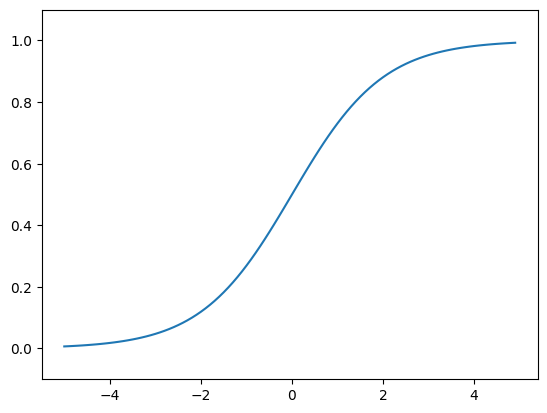

In [133]:
def sigmoid(x: np.ndarray):
  return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()


### ReLU 함수
시그모이드 함수를 많이 사용해 왔지만 최근 더 많이 사용되고 있는 ReLU 함수는 다음과 같다\
ReLU 함수는 수식으로 표현하면 다음과 같으며 간단히 max를 통해 구현할 수 있다

```
h={x (x >= 0)}
 ={0 (x <  0)}
```

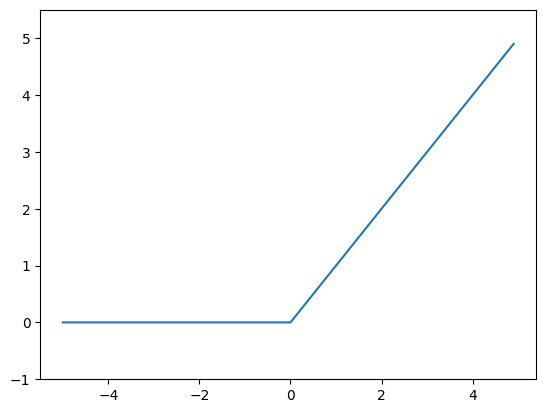

In [134]:
def relu(x: np.ndarray):
  return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.ylim(-1, 5.5)
plt.show()

### 행렬의 점곱
신경망 연산을 이해하기 위해선 행렬의 점곱에 대해서 먼저 알아야 한다.\
A행렬과 B행렬에 대한 곱셈을 할때에는 그냥 원자끼리 곱한다고 해결되는 것이 아니라\
구하고자 하는 x 원소가 위치하는 A 행렬의 모든 행과 x 원소가 위치하는 B 행렬의 모든 열을 곱한뒤 더해 주어야 한다.

즉 다음과 같은 식이 있을때 x를 구하려면 

```
{ 1 2 }   { 5 6 }   { x ? }
{ 3 4 } * { 7 8 } = { ? ? }

x=1*5+2*7=19
```

In [135]:
A=np.array([
  [1, 2],
  [3, 4]
])

B=np.array([
  [5, 6],
  [7, 8]
])

np.dot(A, B)

array([[19, 22],
       [43, 50]])

이 행렬의 점곱을 해보면서 알 수 있는 사실이 하나 있다.\
바로 A 행렬과 B 행렬을 점곱하려면 A의 행 수와 B의 열 수가 일치해야 한다는 점이다.

이는 다음과 같이 확인해볼 수 있다.

In [136]:
A=np.array([
  [1, 2],
  [3, 4]
])

B=np.array([
  [5, 6],
  [7, 8],
  [7, 8]
])


# 각 행렬의 크기:
# A = 2x2
# B = 3x2

# np.dot(A, B)

In [137]:
A=np.array([
  [1, 2],
  [3, 4]
])

B=np.array([
  [5],
  [7]
])


# 각 행렬의 크기:
# A = 2x2
# B = 2x1

np.dot(A, B)

array([[19],
       [43]])

이렇게 A의 행과 B의 열 수를 맞추지 않은 두 행렬의 대한 점곱은 오류가 발생하는 것을 볼 수 있으며\
일치할 경우 오류가 발생하지 않는 것을 볼 수 있다. 이는 두 행렬의 차원 수가 달라도 적용된다.

In [138]:
A=np.array([
  [1, 2],
  [3, 4]
])

B=np.array([5, 7])


# 각 행렬의 크기:
# A = 2x2
# B = 2

np.dot(A, B)

array([19, 43])

### 행렬의 접곱을 통한 퍼셉트론
위의 `x=1*5+2*7` 식에서 퍼셉트론의 모양이 보이지 않는가?\
그렇다 퍼셉트론 식 `y=h(w1*x1+w2*x2+b)`는 행렬곱을 통해서 더 간단히 표현할 수 있다.

```
X=(입력 x값의 행렬)
W=(가중치 w값의 행렬)
B=(편향 b가 하나 있는 행렬)
A=(결과값 y값의 행렬)

A=h(XW+B)
```

이 규칙을 통해 임의의 x와 w, b로 신경망 1층을 만들어보자.

입력 2개의 대한 퍼셉트론 3개를 가진 층이다.

In [139]:
X=np.array([1.0, 0.5])        # 입력 층 입력값 (크기: 2)
W1=np.array([                 # 1층(퍼셉트론 3개)의 대한 입력값(2개) 각각의 가중치 (크기: 2x3)
  [0.1, 0.3, 0.5],
  [0.2, 0.4, 0.6]
])
B1=np.array([0.1, 0.2, 0.3])  # 1층(퍼셉트론 3개)의 대한 각각의 편향 (크기: 3)

h=sigmoid                     # 활성화 함수로 시그모이드 함수 사용
A1=h(np.dot(X, W1) + B1)      # 1층의 퍼셉트론 3개의 결과값 (크기: 3)

A1

array([0.57444252, 0.66818777, 0.75026011])

1층의 결과값 3개를 다음 층에 넘겨보자

1층 결과값 3개의 대한 2개의 퍼셉트론을 가진 층이다.

In [140]:
W2=np.array([                 # 2층(퍼셉트론 2개)의 대한 1층값(3개) 각각의 가중치 (크기: 3x2)
  [0.1, 0.4],
  [0.2, 0.5],
  [0.3, 0.6]
])
B2=np.array([0.1, 0.2])       # 2층(퍼셉트론 2개)의 대한 각각의 편향 (크기: 2)

h=sigmoid                     # 활성화 함수로 시그모이드 함수 사용
A2=h(np.dot(A1, W2) + B2)     # 2층의 퍼셉트론 2개의 결과값 (크기: 2), 1층의 출력값을 사용

A2

array([0.62624937, 0.7710107 ])

마지막으로 2층의 결과값 2개를 출력 층 (퍼셉트론 2개)에 넘겨보자\
이때 출력층은 활성화 함수로 입력 받은것을 그대로 출력하는 항등 함수를 사용해보자

In [141]:
def identity(x: np.ndarray):
  return x

W3=np.array([                 # 출력층(퍼셉트론 2개)의 대한 2층값(2개) 각각의 가중치 (크기: 2x2)
  [0.1, 0.3],
  [0.2, 0.4]
])
B3=np.array([0.1, 0.2])       # 출력층(퍼셉트론 2개)의 대한 각각의 편향 (크기: 2)

h=identity                    # 활성화 함수로 항등 함수 사용
A3=h(np.dot(A2, W3) + B3)     # 출력층의 퍼셉트론 2개의 결과값 (크기: 2), 2층의 출력값을 사용

A3

array([0.31682708, 0.69627909])

이렇게 3층 신경망을 구현해 보았다. \
방금처럼 출력층에 경우 원하는 출력 형태의 따라 은닉층과 다른 함수를 사용하는 경우가 많다.

Regression (회귀) = 항등 함수\
Classification (분류) = 시그모이드 (클래스 2개), 소프트맥스 (클래스 2개 이상)

### 신경망 구현 정리
앞에서 했던 신경망 구현을 한 스크립트로 모으면 다음과 같다

In [142]:
b1=np.array([0.1, 0.2, 0.3])
W1=np.array([
  [0.1, 0.3, 0.5],
  [0.2, 0.4, 0.6]
])

b2=np.array([0.1, 0.2])
W2=np.array([
  [0.1, 0.4],
  [0.2, 0.5],
  [0.3, 0.6]
])

b3=np.array([0.1, 0.2])
W3=np.array([
  [0.1, 0.3],
  [0.2, 0.4]
])

# ---

def forward(x: np.ndarray):
  a1=sigmoid(np.dot(x, W1) + b1)
  a2=sigmoid(np.dot(a1, W2) + b2)
  a3=identity(np.dot(a2, W3) + b3)

  return a3

# ---

x=np.array([1.0, 0.5])
y=forward(x)

y

array([0.31682708, 0.69627909])

### 소프트맥스 함수
분류 문제에서 사용되는 소프트맥스 활성화 함수는 한가지 다른점이 있다.\
다른 활성화 함수의 경우 xW+b의 대한 결과값만 입력으로 취하지만 소프트맥스 함수의 경우\
해당 함수가 속하는 층의 모든 퍼셉트론의 결과값을 참고하여 활성화 결과를 출력한다.

소프트맥스 함수의 경우 e 값을 적극 사용하며 다음과 같다.

In [143]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

softmax(y)

array([0.40625907, 0.59374093])

이 소프트맥스 함수의 특징은 입력값의 대소 관계가 그대로 유지되면서도\
출력값이 0과 1 사이의 값들로 다 합칠 경우 1로 떨어지는 특징이 있다.

이는 분류 문제에서 유용하게 사용할 수 있다.

### MNIST 손글씨 데이터셋의 대한 신경망 구현
미리 계산된(학습된) W값과 b값들을 통해 신경망을 구현해보자

이렇게 W값과 b값이 정해진 상태에서 입력을 신경망에 태우는 것을 Forward propagation, 순전파 라고 한다.

In [144]:
import mnist_loader

In [145]:
_, (x, t) = mnist_loader.load_dataset(normalize=True, flatten=True, one_hot_label=False)
network = mnist_loader.load_pretrained()

def predict(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  z1 = sigmoid(np.dot(x, W1) + b1)
  z2 = sigmoid(np.dot(z1, W2) + b2)
  y = softmax(np.dot(z2, W3) + b3)

  return y

이후 이 생성한 신경망에 테스트 데이터를 순전파해\
몇 %나 정답을 맞췄는지 확인해 보자

In [146]:
correct_count = 0

for i in range(len(x)):
  y = predict(network, x[i]) # 예측 시작
  p = np.argmax(y)           # softmax 값이 가장 높은 원소 추출

  if p == t[i]:              # 예측 성공하면 1 증가
    correct_count += 1

f"Accuracy: {correct_count / len(x)}" # 모든 데이터 중 맞는것의 비율

'Accuracy: 0.9352'

93.52% 의 정확도로 예측하는데 성공했다. 93%면 높은것 같지만 나중에는 더 정확도를 높혀볼 것이다.

그나저나 위의 스크립트는 데이터 셋을 하나하나 forward 했다.\
더 빠른 속도를 위해(numpy의 최적화 설계에서 최대한 이점을 얻기 위해) 한꺼번에 100개씩 forward해보자.

In [147]:
batch_size = 100
correct_count = 0

for i in range(0, len(x), batch_size):    # i는 이제 100씩 증가한다.
  y = predict(network, x[i:i+batch_size]) # i부터 i+100까지 한꺼번에 예측 시작
  p = np.argmax(y, axis=1)                # softmax 값이 가장 높은 원소 100개 추출

  correct_count += np.sum(p == t[i:i+batch_size]) # np.sum에서 True가 1으로 변환되는 것을 활용해서 맞은 개수를 한꺼번에 계산

f"Accuracy: {correct_count / len(x)}" # 모든 데이터 중 맞는것의 비율

'Accuracy: 0.9352'

### One-hot 인코딩
MNIST 데이터셋을 불러올때 One-hot 인코딩을 할것인가 말것인가 선택하는 부분이 있었다.\
위 코드에서는 사용하지 않았지만 나중에 one-hot 인코딩을 사용할때를 대비해 무엇인지 알아보자

다음과 같은 테이블이 있다고 생각해보자
```
| name | age | y                  |
|------|-----|--------------------|
| pmh  | 19  | Computer Science   |
| ljw  | 18  | Art                |
| cth  | 19  | Blockchain         |
```

y를 One-hot 인코딩하였을때 다음과 같아진다.
```
| name | age | y (Computer Science) | y (Art) | y (Blockchain) |
|------|-----|----------------------|---------|----------------|
| pmh  | 19  | True                 | False   | False          |
| ljw  | 18  | False                | True    | False          |
| cth  | 19  | False                | False   | True           |
```

## 신경망 학습
위에서 제작한 신경망이 매우 많은 층을 이루고 있거나 많은 퍼셉트론을 가지고 있다면 사람이 손수 w값과 값을 알아맞추는 것은 매우 어려울 것이다.\
각 퍼셉트론의 w값과 b값 같은 파라미터들을 신경망이 스스로 조정하는 것을 우리는 신경망 학습이라고 한다

### 딥러닝 신경망이란?
머신러닝은 입력값의 특징 추출 알고리즘을 사람이 생각해서 결정한다는 특징이 있다.\
예를 들어 SIFT나 HOG같은 알고리즘을 원본 데이터에 적용시키고 SVM, KNN 같은 뉴럴 네트워크를 진행하는데 있다.

하지만 딥러닝은 머신러닝과 다르게 종단간 머신러닝, 즉 처음부터 끝까지 신경망을 통해 진행한다.\
입력을 그대로 받아 신경망에 적용시킨다는 것이다.

### 훈련 데이터와 시험 데이터
딥러닝을 훈련시키기 위해서는 두가지의 데이터셋이 필요하다

훈련 데이터는 딥러닝 신경망을 학습시키기 위한 데이터로 신경망은 이것을 토대로 파라미터들을 조정하게 된다.\
시험 데이터는 훈련 데이터와 구분된 데이터셋으로 신경망이 입력받은 훈련 데이터에게만 적합한 과적합 상태가 되지 않도록 테스트하기 위해 존재한다.

또한 이렇게 신경망이 훈련 데이터에만 치중되어 범용적이지 못하게 되는 것을 오버피팅이라고 예기한다.

### 손실 함수
손실함수는 현재의 파라미터로 훈련 데이터에서 얼마나 예측에 실패했냐를 의미하는 함수이다.

신경망은 손실 함수의 값을 통하여 현재 자신이 얼마나 더 수정되어야 하는지 결정하게 된다.\
사실 어려운게 아니라 y 배열과 t 배열을 받았을때 두 배열이 얼마나 차이나냐~ 라는 말이다.

#### 평균 제곱 오차
평균 제곱 오차(MSE) 함수는 손실 함수 중에서 가장 많이 사용되는 함수로

파이썬 코드로 다음과 같이 작성할 수 있다

In [148]:
def mean_squared_error(y, t):
  return 0.5 * np.sum((y-t)**2)

이때 y는 모델이 예측한 결과 값이며 t는 실제 정답 값이다.

Class가 5개인 Classification 문제에서 다음과 같은 y와 t가 나왔을때 MSE값을 보자

In [149]:
t = np.array([0, 0, 1, 0, 0]) # 정답은 class 2
y = np.array([0.4, 0.1, 0.2, 0.05, 0.2]) # 정답이 class 0이라고 예측함

mean_squared_error(y, t) # 0.4 정도로 손실률이 높음

np.float64(0.4262500000000001)

In [150]:
y = np.array([0.2, 0.1, 0.6, 0.05, 0.2]) # 정답이 class 2이라고 예측함

mean_squared_error(y, t) # 0.1 정도로 손실률이 낮음

np.float64(0.12625000000000003)

이렇게 정답과 가까워질수록 손실함수의 결과값이 낮아지는 것을 볼 수 있다.

신경망은 이 값을 기준으로 학습을 진행하게 된다.

#### 교차 엔트로피 오차
또 다른 함수인 교차 엔트로피 오차를 살펴보자. 이것도 자주 사용된다.

In [151]:
def cross_entropy_error(y, t):
  delta = 1e-7 # log(0)으로 인해 -Infinity가 나지 않도록 매우 작은 값 추가
  return -np.sum(t * np.log(y + delta))

y = np.array([0.4, 0.1, 0.2, 0.05, 0.2]) # 정답이 class 0이라고 예측함

cross_entropy_error(y, t) # 1.6 정도로 손실률이 높음

np.float64(1.6094374124342252)

In [152]:
y = np.array([0.2, 0.1, 0.6, 0.05, 0.2]) # 정답이 class 2이라고 예측함

cross_entropy_error(y, t) # 0.5 정도로 손실률이 낮음

np.float64(0.510825457099338)

#### 배치값을 위한 교차 엔트로피 오차
이때까지의 손실 함수는 하나의 데이터의 대한 손실 함수이다.\
만약 배치 작업을 해서 여러 데이터의 대한 결과가 나왔을때 그 모든것에 대한 손실 함수는 다음과 같이 짤 수 있다.

In [153]:
def cross_entropy_error(y: np.ndarray, t: np.ndarray):
  if y.ndim == 1:            # 입력이 배치가 아닐 경우(1차원일 경우) 아래 식이 작동하지 않아 그냥 대충 2차원으로 때운다
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)
  
  # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
  if t.size == y.size:
    t = t.argmax(axis=1)
            
  batch_size = y.shape[0]
  return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

t = np.array([
  [0, 0, 1, 0, 0],
  [0, 0, 1, 0, 0],
  [0, 0, 1, 0, 0] # 정답이 2일때
])

y = np.array([
  [0.4, 0.1, 0.2, 0.05, 0.2], # 정답을 0으로 예측 (틀림)
  [0.4, 0.1, 0.2, 0.05, 0.2], # 정답을 0으로 예측 (틀림)
  [0.2, 0.1, 0.6, 0.05, 0.2]  # 정답을 2으로 예측 (정답)
])

cross_entropy_error(y, t)

np.float64(1.2432334273225962)

In [154]:
y = np.array([
  [0.4, 0.1, 0.2, 0.05, 0.2], # 정답을 0으로 예측 (틀림)
  [0.2, 0.1, 0.6, 0.05, 0.2], # 정답을 2으로 예측 (정답)
  [0.2, 0.1, 0.6, 0.05, 0.2]  # 정답을 2으로 예측 (정답)
])

cross_entropy_error(y, t)

np.float64(0.8770294422109671)

### 미니배치
손실 함수를 사용하려면 먼저 예측값을 알아야하므로 순전파를 완료해야 한다. \
게다가 완료한 순전파 값들을 계산하여 손실률을 구해야한다

위 예제에서는 순전파 완료 값을 직접 지정했고 개수도 몇개 안되므로 빠르게 끝났지만\
데이터셋이 매우 많을 경우를 생각해보면 손실 함수 실행 속도가 너무 느릴 수 있다.

그래서 데이터셋에서 일부분을 랜덤하게 뽑아와 그거의 대한 손실 함수만 계산한 하는 것을 미니배치라고 하며\
이때 이 미니배치의 크기를 **배치 사이즈**라고 부른다. 또한 이 미니배치를 여러번 반복해서 데이터 셋을 완전히 1번 소진하였을때 1 **에폭**이라 부르며\
이 에폭값이 높으면 높을수록 데이터셋을 여러번 학습에 사용했다는 것을 말한다.

### 정답률이 아니라 손실율을 쓰는 이유?
정답률을 기준으로 하면 되지 왜 손실율을 쓰는지는 미분의 정의와 관련이 있다.

미분은 함수 f의 그래프가 있을때 한없이 작은 범위에서의 기울기를 구하는 것을 의미한다.\
미분을 통해 자신의 위치의 기울기를 알게 되면 우리가 원하는 값으로 가는 기울기를 제시해 줄 수 있다는 것이다.

이것을 우리가 배우는 것에 대입하면 퍼셉트론의 w, b에 대한 손실함수를 미분하여 손실율이 가장 적도록 만드는 기울기를 알 수 있다는 것이다. \
그리고 그 기울기를 적절히 타고 내려가면 손실율이 낮은 w와 b값을 알 수 있게 된다!

### 함수의 대한 미분 (=특정 지점 기울기 구하기)
위에서 설명한 미분 함수는 다음과 같이 정의할 수 있다.

미분을 계산할 함수 f를 받으며 특정 지점 좌표인 numpy 배열 x를 받는다.\
함수의 파라미터가 많으므로 편미분이라 할 수 있으며 폰노이만식 컴퓨터의 소숫점 계산 문제를 해결하기 위해 차분을 사용하도록 약간 변형되어 있다.

In [155]:
def numerical_gradient(f, x: np.ndarray):
  h = 1e-4
  grad = np.zeros_like(x)

  for idx in range(x.size):
    tmp = x[idx]

    x[idx] = tmp + h
    fxh1 = f(x)

    x[idx] = tmp - h
    fxh2 = f(x)

    grad[idx] = (fxh1 - fxh2) / (2 * h)
    x[idx] = tmp

  return grad

자 이제 함수 f 을 미분해보자

In [156]:
def f(x: np.ndarray):
  return x[0] ** 2 + x[1] ** 2

numerical_gradient(f, np.array([3.0, 4.0])) # 출력시 numpy가 결과값을 약간 반올림 해준다.

array([6., 8.])

In [157]:
numerical_gradient(f, np.array([0.0, 2.0]))

array([0., 4.])

In [158]:
numerical_gradient(f, np.array([3.0, 0.0]))

array([6., 0.])

배치를 고려한 함수는 다음과 같이 작성할 수 있다.

In [159]:
def _numerical_gradient_no_batch(f, x):
  h = 1e-4
  grad = np.zeros_like(x)

  for idx in range(x.size):
    tmp = x[idx]

    x[idx] = tmp + h
    fxh1 = f(x)

    x[idx] = tmp - h
    fxh2 = f(x)

    grad[idx] = (fxh1 - fxh2) / (2 * h)
    x[idx] = tmp

  return grad

def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    
    grad = np.zeros_like(X)
    for idx, x in enumerate(X):
        grad[idx] = _numerical_gradient_no_batch(f, x)
    
    return grad

### 경사하강법
경사 하강법은 간단하게 말하면 현재 위치를 하나 잡고 미분한뒤 그 기울기 만큼 조금 이동 후 다시 미분.. 을 반복하는 것을 의미한다.

이때 여러가지 인자값이 필요하게 되는데:

`f`: 경사하강법을 시행할 함수\
`init_x`: 시작 지점 좌표\
`lr`: learning rate라고도 하며 미분을 통해 알아낸 기울기를 통해 얼마만큼 이동할 것인가를 의미한다.\
`step_num`: 미분의 기울기와 lr값을 통해 몇번이나 내려가는 작업을 반복할꺼냐는 의미이다.

이때 lr이 너무 크게 되면 이리저리 왔다갔다 하느라 최저점을 찾기 어려워지고\
lr이 너무 작게 되면 하강에 너무 오래걸려 별로 움직이지를 않는다.

코드로 작성하면 다음과 같다.

In [160]:
def gradient_descent(f, init_x: np.ndarray, lr=0.01, step_num=100):
  x = init_x

  for _ in range(step_num):
    grad = numerical_gradient(f, x)
    x -= lr * grad

  return x

In [161]:
init_x = np.array([-3.0, 4.0])
gradient_descent(f, init_x, lr=10.0, step_num=100) # lr이 너무 클때 최저점 못찾음

array([-2.58983747e+13, -1.29524862e+12])

In [162]:
init_x = np.array([-3.0, 4.0])
gradient_descent(f, init_x, lr=1e-10, step_num=100) # lr이 너무 작을때 별로 움직이지 않음

array([-2.99999994,  3.99999992])

In [163]:
init_x = np.array([-3.0, 4.0])
gradient_descent(f, init_x, lr=0.1, step_num=100) # 적정값

array([-6.11110793e-10,  8.14814391e-10])

### 엑조디아
다 합쳐보자, 2층짜리 신경망이다.

In [164]:
class MyAwesomeModel:
  # 초기값 설정
  def __init__(self, input_size, hidden_size, output_size):
    self.params = {}
    self.params['W1'] = 0.01 * np.random.randn(input_size, hidden_size) # 초기 weight 값은 그냥 랜덤하게 해보자, 랜덤이 너무 커서 0.01을 곱해줬다
    self.params['b1'] = np.zeros(hidden_size)                           # bias값은 비운다
    
    self.params['W2'] = 0.01 * np.random.randn(hidden_size, output_size)
    self.params['b2'] = np.zeros(output_size)

  # 예측 (순전파)
  def predict(self, x):
    W1, W2 = self.params['W1'], self.params['W2']
    b1, b2 = self.params['b1'], self.params['b2']

    a1 = np.dot(x, W1) + b1   # 퍼셉트론 실행
    z1 = sigmoid(a1)          # 활성화 함수 실행

    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)           # n>2개 classficiation 문제이므로 softmax 사용

    return y
  
  # 손실 함수
  def loss(self, x, t):
    y = self.predict(x)

    return cross_entropy_error(y, t)

  # 정확도 테스트 함수
  def accuracy(self, x, t):
    y = self.predict(x)

    y = np.argmax(y, axis=1) # 예측에서 softmax 한 것중 가장 큰것 선택
    t = np.argmax(t, axis=1) # 정답 데이터셋은 one hot 인코딩 되어 있어서 가장 큰것 선택

    return np.sum(y == t) / float(x.shape[0])
  
  # 손실 함수의 대한 기울기 계산 (미분)
  def numerical_gradient(self, x, t):
    loss_W = lambda W: self.loss(x, t) # 미분 대상 함수 (손실 함수)

    grads = {}
    grads['W1'] = numerical_gradient(loss_W, self.params['W1']) # 1층 w값의 대한 기울기
    grads['b1'] = numerical_gradient(loss_W, self.params['b1']) # 1층 b값의 대한 기울기

    grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
    grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

    return grads

그럼 위 신경망을 MNIST 데이터셋으로 학습시켜보자.

In [165]:
%%script true

# 
# 네트워크 준비 ---
net = MyAwesomeModel(
  input_size  = 28 * 28, # MNIST의 사진 크기가 28 픽셀 곱하기 28이므로 입력층 28*28노드
  hidden_size = 50,     # 은닉층 퍼셉트론 100개
  output_size = 10       # 0부터 10까지를 예측하는 classification 문제이므로 출력층 퍼셉트론 10개 
)


#
# 데이터셋 준비 --- 

(x_train, t_train), (x_test, t_test) = \
  mnist_loader.load_dataset(normalize=True, one_hot_label=True)


#
# 하이퍼파라미터 ---

epochs        = 16                 # 데이터셋 전체 학습 횟수
train_size    = x_train.shape[0]   # 총 데이터셋의 개수
batch_size    = 100                # 미니배치 크기
learning_rate = 0.1                # 경사하강법 lr


#
# 학습 시작

# 한 에폭 시작
for epoch_idx in range(epochs):
  print(f"Epoch #{epoch_idx} ---")

  # 데이터셋 섞기 (데이터셋이 혹시나 제대로 분포되어 있지 않을 수 있어 한번 섞어준다. ex: 앞에는 정답이 0인 사진만 있는다던지...)
  s = np.arange(0, train_size, 1)
  np.random.shuffle(s)

  x_train = x_train[s]
  t_train = t_train[s]

  # 한 미니배치 생성
  for iter_start in range(0, train_size, batch_size):
    print(f"  Mini-Batch: {iter_start}...{iter_start+batch_size}")

    x_batch = x_train[iter_start:iter_start+batch_size]
    t_batch = t_train[iter_start:iter_start+batch_size]

    # 기울기 계산
    grad = net.numerical_gradient(x_batch, t_batch)

    # 기울기 반영
    for key in ('W1', 'b1', 'W2', 'b2'):
      net.params[key] -= learning_rate * grad[key]

    # 손실율 기록
    loss = net.loss(x_batch, t_batch)
    print(f"  Loss: {loss}")

  # 에폭 종료후 정확도 계산
  train_acc = net.accuracy(x_train, t_train)
  test_acc = net.accuracy(x_test, t_test)

  print(f"Epoch #{epoch_idx} accuracy: train {train_acc}, test {test_acc}")


위의 학습 코드를 실행시키면 우리가 작성한 미분 함수로는 매우 학습에 오래 걸린다는 것을 알 수 있다.

이 알고리즘을 쫌 더 개선해 보자

## 오차역전파법 (역전파)
앞의 수치 미분을 통해 가중치를 수정하는 방법은 구현이 간단하고 이해하기 쉽지만 시간이 오래 걸린다\
이번에는 효율적으로 기울기를 계산하는 오차역전파법을 알아보자.

### 계산 그래프
다음과 같은 간단한 함수 f가 있다고 가정하자.

In [166]:
def f(x: int):
  return x * 12 + 30

f(10)

150

이 함수는 x로 10을 주었을때 150을 반환한다.\
이 함수를 계산 그래프를 통해 나타내면 다음과 같다.

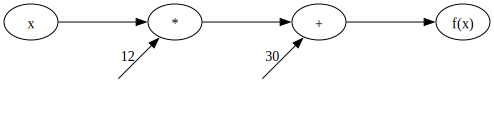

In [167]:
import graphviz

dot = graphviz.Digraph(
  strict=True,
  engine='fdp'
)

dot.node('x',         pos='0,0!')
dot.node('a', '*',    pos='2,0!')
dot.node('b', '+',    pos='4,0!')
dot.node('c', 'f(x)', pos='6,0!')

dot.node('a1', style='invis', pos='1,-1!')
dot.node('b1', style='invis', pos='3,-1!')

dot.edges(['xa', 'ab', 'bc'])
dot.edge('a1', 'a', '12')
dot.edge('b1', 'b', '30')

dot

x에 10을 대입하였을때는 다음과 같이 그릴 수 있다.

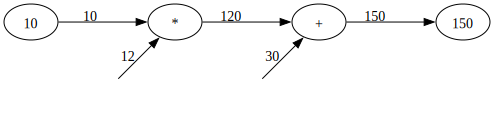

In [168]:
dot.node('x', '10')
dot.node('c', '150')

dot.edge('x', 'a', '10')
dot.edge('a', 'b', '120')
dot.edge('b', 'c', '150')

dot

자 그럼 미분을 통해 결과값 150의 대한 각 연산들의 기울기 (결과값에 영향을 미치는 정도)를 알아보자

덧셈의 경우 두 값이 상승하는 만큼 결과값도 상승할 것이므로 다음과 같이 표시할 수 있다.

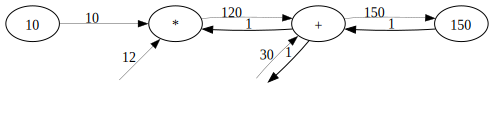

In [169]:
dot.edge('c', 'b', '1')

dot.edge('b', 'a', '1')
dot.edge('b', 'b1', '1')

dot.edge('x', 'a', '10',  penwidth='0.3')
dot.edge('a', 'b', '120', penwidth='0.3')
dot.edge('b', 'c', '150', penwidth='0.3')
dot.edge('a1', 'a', '12', penwidth='0.3')
dot.edge('b1', 'b', '30', penwidth='0.3')

dot

곱셈의 경우 하나의 값을 변경하였을때 반대편 값 만큼 곱해져서 영향이 발생할 것이다.

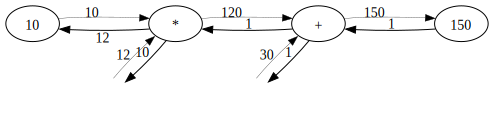

In [170]:
dot.edge('a', 'x', '12')
dot.edge('a', 'a1', '10')

dot

아래 함수도 비슷한 방식으로 계산 그래프를 해석해보자.

In [171]:
def f(x1, x2):
  return ((x1 * 2) + (x2 * 3)) * 1.1

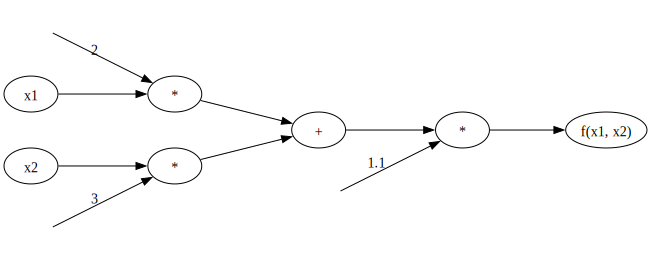

In [172]:
dot = graphviz.Digraph(
  strict=True,
  engine='fdp'
)

dot.node('x1', pos='0,1!')
dot.node('x2', pos='0,0!')

dot.node('a1', '*', pos='2,1!')
dot.node('a2', '*', pos='2,0!')

dot.node('x1a', style='invis', pos='0,2!')
dot.node('x2a', style='invis', pos='0,-1!')

dot.edge('x1', 'a1')
dot.edge('x1a', 'a1', '2')

dot.edge('x2', 'a2')
dot.edge('x2a', 'a2', '3')

dot.node('b', '+', pos='4,0.5!')

dot.edge('a1', 'b')
dot.edge('a2', 'b')

dot.node('c', '*', pos='6,0.5!')
dot.edge('b', 'c')

dot.node('cb', style='invis', pos='4,-0.5!')
dot.edge('cb', 'c', '1.1')

dot.node('y', 'f(x1, x2)', pos='8,0.5!')
dot.edge('c', 'y')

dot

f에 `f(100, 150)` 를 넣었다고 가정했을때

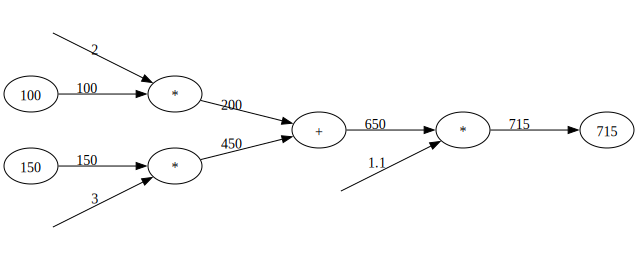

In [173]:
dot.node('x1', '100', pos='0,1!')
dot.node('x2', '150', pos='0,0!')

dot.edge('x1', 'a1', '100')
dot.edge('x2', 'a2', '150')

dot.edge('a1', 'b', '200')
dot.edge('a2', 'b', '450')

dot.edge('b', 'c', '650')
dot.edge('c', 'y', '715')

dot.node('y', '715', pos='8,0.5!')

dot

역방향으로 기울기를 표현하면 다음과 같다.

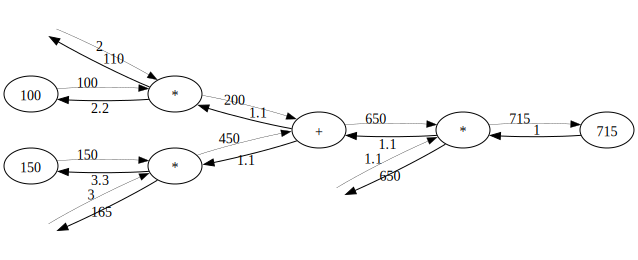

In [174]:
dot.edge('x1', 'a1', '100', penwidth='0.3')
dot.edge('x2', 'a2', '150', penwidth='0.3')
dot.edge('a1', 'b', '200', penwidth='0.3')
dot.edge('a2', 'b', '450', penwidth='0.3')
dot.edge('b', 'c', '650', penwidth='0.3')
dot.edge('c', 'y', '715', penwidth='0.3')
dot.edge('x1a', 'a1', '2', penwidth='0.3')
dot.edge('x2a', 'a2', '3', penwidth='0.3')
dot.edge('cb', 'c', '1.1', penwidth='0.3')

dot.edge('y', 'c', '1')
dot.edge('c', 'b', '1.1')
dot.edge('b', 'a2', '1.1')
dot.edge('b', 'a1', '1.1')
dot.edge('a2', 'x2', '3.3')
dot.edge('a1', 'x1', '2.2')

dot.edge('a1', 'x1a', '110')
dot.edge('a2', 'x2a', '165')
dot.edge('c', 'cb', '650')

dot

이런식으로 어떠한 함수가 있을 때 뒤에서 부터 미분을 하여\
결과값의 대한 기울기를 알아내는 것을 역전파라고 한다.

코드로 나타내면 다음과 같다.

### 곱셈 계층의 역전파
곱셈 계층은 (순전파 기준으로) 다음층에서 받은 기울기에 곱할 두 값을 반대로 곱하여 기울기를 구현한다.

In [175]:
class MulLayer:
  def __init__(self):
    self.x = None
    self.y = None

  def forward(self, x, y):
    self.x = x
    self.y = y
    out = x * y

    return out

  def backward(self, dout):
    dx = dout * self.y  # x와 y를 바꾼다.
    dy = dout * self.x

    return dx, dy

### 덧셈 계층의 역전파
덧셈 계층은 (순전파 기준으로) 다음층에서 받은 기울기를 그대로 전달하여 기울기를 구현한다

In [176]:
class AddLayer:
  def __init__(self):
    pass

  def forward(self, x, y):
    out = x + y

    return out

  def backward(self, dout):
    dx = dout * 1
    dy = dout * 1

    return dx, dy

구현한 곱셈, 덧셈 계층을 활용하여 전의 f 함수를 구현하면 다음과 같다

In [177]:
x1 = 100
x2 = 150

layer1_1 = MulLayer()
layer1_2 = MulLayer()

const1_1 = 2
const1_2 = 3

out1_1 = layer1_1.forward(x1, const1_1)
out1_2 = layer1_2.forward(x2, const1_2)

layer2 = AddLayer()
out2 = layer2.forward(out1_1, out1_2)

layer3 = MulLayer()
const3 = 1.1
out3 = layer3.forward(out2, const3)

int(out3)

715

구현한 계산 그래프에서 역전파를 수행해보자\
전에 그렸던 계산 그래프의 예상 역전파 output과 같은것을 볼 수 있다.

In [178]:
dout3 = 1

dout2, dconst3 = layer3.backward(dout3)

dout1_1, dout1_2 = layer2.backward(dout2)

dx1, dconst1_1 = layer1_1.backward(dout1_1)
dx2, dconst1_2 = layer1_2.backward(dout1_2)

[dconst1_1, dx1, dx2, dconst1_2, dout1_1, dout1_2, dout2, dconst3, dout3]

[110.00000000000001, 2.2, 3.3000000000000003, 165.0, 1.1, 1.1, 1.1, 650, 1]

### 활성화 함수들의 역전파
이제 신경망의 함수들의 역전파를 구현해보자

ReLU는 0보다 클 경우에만 그대로 순전파 하는 함수이다.

역전파에도 마찬가지로 0보다 큰 경우에만 이전 레이어에 기울기를 그대로 전달하며\
0보다 크지 않은 경우에는 기울기를 0으로 만들어 전달되지 않도록 한다.

In [179]:
class Relu:
  def __init__(self):
    self.mask = None

  def forward(self, x):
    self.mask = (x <= 0)
    out = x.copy()
    out[self.mask] = 0

    return out

  def backward(self, dout):
    dout[self.mask] = 0
    dx = dout

    return dx

다음은 시그모이드 활성화 함수의 역전파를 구현해보자.

In [180]:
class Sigmoid:
  def __init__(self):
    self.out = None

  def forward(self, x):
    out = sigmoid(x)
    self.out = out
    return out

  def backward(self, dout):
    dx = dout * (1.0 - self.out) * self.out

    return dx

### 퍼셉트론 계층의 역전파
퍼셉트론 계층, 즉 w를 곱하고 b를 더하는 계층, Affine 계층이라고도 불리는 이 계층은\
일반적인 곱셈 계층이 아니라 행렬의 점곱 계층이 존재한다.

다음과 같이 파이썬으로 작성할 수 있으며 이때 행렬의 T값은 행렬을 90도 눕힌것이라고 생각하면 된다.

In [181]:
class Affine:
  def __init__(self, W, b):
    self.W = W
    self.b = b
    
    self.x = None
    self.original_x_shape = None
    
    # 가중치와 편향 매개변수의 미분
    self.dW = None
    self.db = None

  def forward(self, x):
    # 텐서 대응
    self.original_x_shape = x.shape
    x = x.reshape(x.shape[0], -1)
    self.x = x

    out = np.dot(self.x, self.W) + self.b

    return out

  def backward(self, dout):
    dx = np.dot(dout, self.W.T)
    self.dW = np.dot(self.x.T, dout)
    self.db = np.sum(dout, axis=0)
    
    dx = dx.reshape(*self.original_x_shape)  # 입력 데이터 모양 변경(텐서 대응)
    return dx

### 소프트맥스-크로스 엔트로피 손실 함수 계층의 역전파
소프트맥스와 크로스 엔트로피 손실 함수를 한꺼번에 하나의 클래스로 구현하면 다음과 같다.

소프트맥스를 출력층으로 하는 신경망에서 크로스 엔트로피 손실 함수를 쓰는 이유는\
역전파를 하였을때 해당 계층 기울기가 깔끔하게 떨어지기 때문이다.

In [182]:

class SoftmaxWithLoss:
  def __init__(self):
    self.loss = None # 손실함수
    self.y = None    # softmax의 출력
    self.t = None    # 정답 레이블(원-핫 인코딩 형태)
      
  def forward(self, x, t):
    self.t = t
    self.y = softmax(x)
    self.loss = cross_entropy_error(self.y, self.t)
    
    return self.loss

  def backward(self, dout=1):
    batch_size = self.t.shape[0]
    if self.t.size == self.y.size: # 정답 레이블이 원-핫 인코딩 형태일 때
      dx = (self.y - self.t) / batch_size
    else:
      dx = self.y.copy()
      dx[np.arange(batch_size), self.t] -= 1
      dx = dx / batch_size
    
    return dx

### Better 엑조디아

이때까지 배운 오차역전파법 (역전파, 뒤에서 부터 미분하며 기울기를 구하는 것)를 통해 w와 b값을 조정하도록 하면\
수치 미분으로 구현했던 전의 네트워크 보다 학습 시간이 매우 단축될 수 있다. 자 다시 한번 합쳐보자.

In [183]:
from collections import OrderedDict

class MyAwesomeModelV2:
  # 초기값 설정
  def __init__(self, input_size, hidden_size, output_size):
    self.params = {}
    self.params['W1'] = 0.01 * np.random.randn(input_size, hidden_size) # 초기 weight 값은 그냥 랜덤하게 해보자, 랜덤이 너무 커서 0.01을 곱해줬다
    self.params['b1'] = np.zeros(hidden_size)                         # bias값은 비운다
    
    self.params['W2'] = 0.01 * np.random.randn(hidden_size, output_size)
    self.params['b2'] = np.zeros(output_size)

    # 레이어 쌓기 (추가됨)
    self.layers = OrderedDict()
    self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
    self.layers['Relu1']   = Relu()
    self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
    self.lastLayer         = SoftmaxWithLoss()

  # 예측 (순전파, 수정됨)
  def predict(self, x):
    for layer in self.layers.values():
      x = layer.forward(x)

    return x
  
  # 손실 함수 (수정됨)
  def loss(self, x, t):
    y = self.predict(x)

    return self.lastLayer.forward(y, t)

  # 정확도 테스트 함수
  def accuracy(self, x, t):
    y = self.predict(x)
    y = np.argmax(y, axis=1)

    if t.ndim != 1:
      t = np.argmax(t, axis=1)

    return np.sum(y == t) / float(x.shape[0])
  
  # 역전파를 통한 기울기 계산 (미분, 추가됨)
  def gradient(self, x, t):
    self.loss(x, t)

    dout = 1
    dout = self.lastLayer.backward(dout)

    layers = list(self.layers.values())
    layers.reverse()

    for layer in layers:
      dout = layer.backward(dout)

    grads = {}
    grads['W1'] = self.layers['Affine1'].dW
    grads['b1'] = self.layers['Affine1'].db
    grads['W2'] = self.layers['Affine2'].dW
    grads['b2'] = self.layers['Affine2'].db

    return grads

자 다시 학습해보자.

In [ ]:
# 
# 네트워크 준비 ---
net = MyAwesomeModelV2(
  input_size  = 28 * 28, # MNIST의 사진 크기가 28 픽셀 곱하기 28이므로 입력층 28*28노드
  hidden_size = 100,     # 은닉층 퍼셉트론 100개
  output_size = 10       # 0부터 10까지를 예측하는 classification 문제이므로 출력층 퍼셉트론 10개 
)


#
# 데이터셋 준비 --- 

(x_train, t_train), (x_test, t_test) = \
  mnist_loader.load_dataset(normalize=True, one_hot_label=True)


#
# 하이퍼파라미터 ---

epochs        = 16                 # 데이터셋 전체 학습 횟수
train_size    = x_train.shape[0]   # 총 데이터셋의 개수
batch_size    = 500                # 미니배치 크기
learning_rate = 0.5                # 경사하강법 lr


#
# 학습 시작

# 한 에폭 시작
for epoch_idx in range(epochs):
  print(f"Epoch #{epoch_idx} ---")

  # 데이터셋 섞기 (데이터셋이 혹시나 제대로 분포되어 있지 않을 수 있어 한번 섞어준다. ex: 앞에는 정답이 0인 사진만 있는다던지...)
  s = np.arange(0, train_size, 1)
  np.random.shuffle(s)

  x_train = x_train[s]
  t_train = t_train[s]

  # 한 미니배치 생성
  for iter_start in range(0, train_size, batch_size):
    # print(f"  Mini-Batch: {iter_start}...{iter_start+batch_size}")

    x_batch = x_train[iter_start:iter_start+batch_size]
    t_batch = t_train[iter_start:iter_start+batch_size]

    # 기울기 계산
    grad = net.gradient(x_batch, t_batch)

    # 기울기 반영
    for key in ('W1', 'b1', 'W2', 'b2'):
      net.params[key] -= learning_rate * grad[key]

    # 손실율 기록
    loss = net.loss(x_batch, t_batch)
    # print(f"  Loss: {loss}")

  # 에폭 종료후 정확도 계산
  train_acc = net.accuracy(x_train, t_train)
  test_acc = net.accuracy(x_test, t_test)

  print(f"Epoch #{epoch_idx} accuracy: train {train_acc}, test {test_acc}")

Epoch #0 ---
  Mini-Batch: 0...500
  Loss: 2.2964752151399024
  Mini-Batch: 500...1000
  Loss: 2.2929821861493385
  Mini-Batch: 1000...1500
  Loss: 2.287743393605074
  Mini-Batch: 1500...2000
  Loss: 2.2787347077444937
  Mini-Batch: 2000...2500
  Loss: 2.2676468011195716
  Mini-Batch: 2500...3000
  Loss: 2.253648838779269
  Mini-Batch: 3000...3500
  Loss: 2.2341961637240058
  Mini-Batch: 3500...4000
  Loss: 2.201766070656175
  Mini-Batch: 4000...4500
  Loss: 2.151732652357577
  Mini-Batch: 4500...5000
  Loss: 2.0802692294412535
  Mini-Batch: 5000...5500
  Loss: 2.0065631547067055
  Mini-Batch: 5500...6000
  Loss: 1.9118949274369796
  Mini-Batch: 6000...6500
  Loss: 1.8334464856487325
  Mini-Batch: 6500...7000
  Loss: 1.7428438094409804
  Mini-Batch: 7000...7500
  Loss: 1.5436973438587787
  Mini-Batch: 7500...8000
  Loss: 1.4987072368371432
  Mini-Batch: 8000...8500
  Loss: 1.3862448063892325
  Mini-Batch: 8500...9000
  Loss: 1.487416011035132
  Mini-Batch: 9000...9500
  Loss: 1.1725655

상당히 빨라진 것을 볼 수 있다!\
최종 정확도가 학습 데이터는 99.95%, 테스트 데이터는 98.23%로 정확도가 높은 모델이 완성되었다.

Predict: 1
Answer: 1


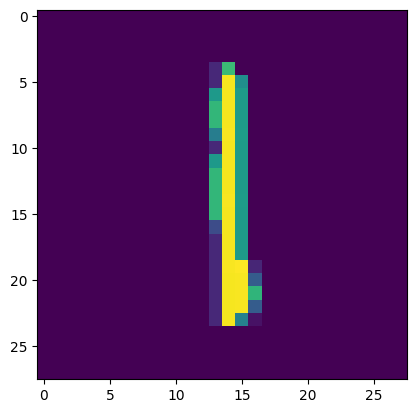

In [185]:
n = np.random.randint(0, x_test.shape[0])
x = x_test[n:n+1]
t = t_test[n]

y = net.predict(x)[0]

print(f"Predict: {np.argmax(y)}")
print(f"Answer: {np.argmax(t)}")

plt.imshow(np.reshape(x[0], (28, 28)))
plt.show()

## 최적화 알고리즘들 (Optimizers)
이제는 경사하강법 말고도 다른 최적화 방법도 알아보자. \
참고로 loss 함수가 최저가 되도록 하는 w와 b를 구하는 알고리즘을 최적화 알고리즘이라 한다.

### Momentum Optimizer
이때까지 봤던 확률적 경사 하강법은 앞 뒤로 왔다갔다 하는 상황이 많이 발생한다.

그래서 Momentum 알고리즘은 경사진 곳에서 공을 굴렸을때 하강하는 것처럼 물리법칙을 활용해 하강하는 것을 말한다.\
공이 바닥을 구르게 되므로 경사 하강법 보다 더 안정적인 모습을 보이게 된다.

<img src="img/epW89.jpg" width="300px">

### AdaGrad
경사하강법의 두번째 문제는 초기에 설정한 Learning Rate를 계속 사용하는데 있다\
하강을 하면 할수록 Learning Rate를 줄여가며 하강하면 초반에는 하강을 빠르게 하고\
하강이 어느정도 된 상태에서는 더 미세하게 이동할 수 있지 않을까?

그래서 AdaGrad는 각각의 개발 매개변수에 학습률을 점차적으로 조정하며 진행한다.

<img src="img/output_adagrad_2fb0ed_6_1.svg" width="300px">

### Adam
Adam은 이 두 방법을 둘다 사용하는 알고리즘으로 매개변수의 갱신 정도를 능동적으로 조정하면서\
모멘텀 물리 법칙을 따라 튀는 현상을 억제한다.

<img src="img/public.avif" width="300px">

## 가중치 초기값 설정
뉴럴 네트워크에서 학습전 가중치의 초기값을 적절히 설정하는 것은 매우 중요하다.

만약 가중치의 초기값이 적절히 분포되어 있지 않는 경우\
미분시 기울기가 0이되어 모델 학습이 개선되지 않는 기울기 소실 문제와\
한 레이어의 많은 퍼셉트론의 결과값이 서로 비슷하게 되어 퍼셉트론을 여러개 두는 의미가 없어지는 표현력 문제가 있다.

이렇기 때문에 딥러닝 학계에서는 여러가지 방법을 시도해 보고 있다.

다음과 같은 간단한 모델이 있다고 생각하자

In [186]:
def test_w_init(f, h=sigmoid):
  input_data = np.random.randn(1000, 100)
  node_num = 100
  hidden_layer_size = 5
  activations = {}

  x = input_data

  for i in range(hidden_layer_size):
    if i != 0:
      x = activations[i-1]

    w = f(node_num)
    a = np.dot(x, w)
    z = h(a)

    activations[i] = z
    
  for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))

### 정규분포를 활용한 초깃값
표준편차를 가진 임의의 w값들을 설정해두면 여러 레이어 이후 어떻게 될까?

흠... 각 w값들이 0과 1에 치우쳐저 있어 층이 깊어져도 크게 변하지 않는 것을 볼 수 있다.\
이렇게 파라미터가 0과 1 한쪽에 치우쳐저 있는 경우 기울기가 소실되어 수정이 일어나지 않는것을 기울기 소실이라 한다

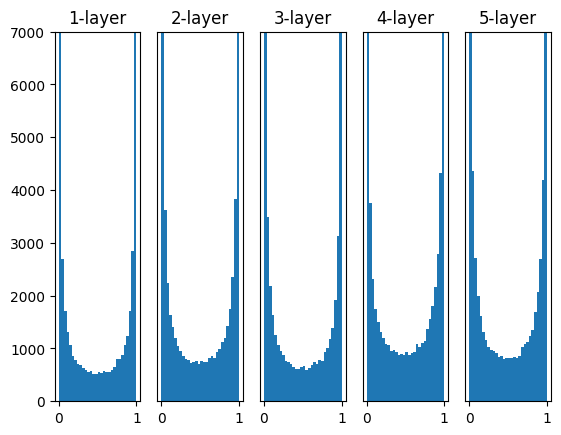

In [187]:
def f(node_num):
  return np.random.randn(node_num, node_num)

test_w_init(f)
plt.show()

표준편차를 0.01로 조절하면 어떻게 될까?

이번엔 0.5에 치우쳐저 있게 된다. 이러면 기울기가 소실되지는 않지만 모든 퍼셉트론이 비슷한 출력을 할것이므로\
퍼셉트론을 하나 하는것과 별반 다른게 없어지게 된다. 이것을 "포현력을 제한한다"라고 부른다.

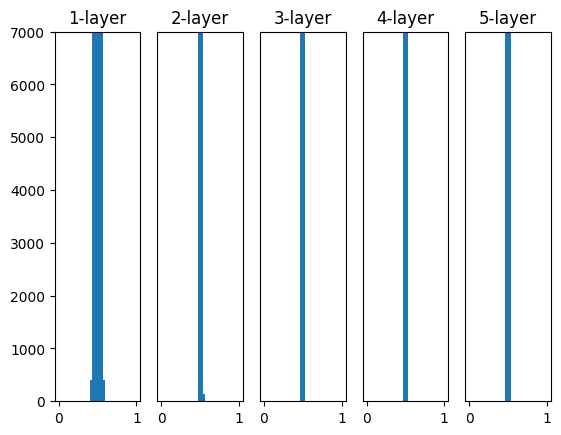

In [188]:
def f(node_num):
  return np.random.randn(node_num, node_num) * 0.01

test_w_init(f)
plt.show()

물론 표준 분포를 0.1로 하면 고르게 분포된다. 하지만 매번 표준 분포를 이런식으로 예측하는 것은 매우 까다롭다.

자동으로 분포를 고르게 해주는 알고리즘들을 알아보자.

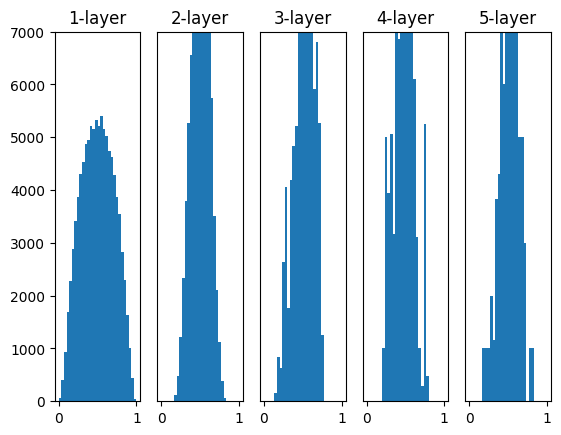

In [189]:
def f(node_num):
  return np.random.randn(node_num, node_num) * 0.1

test_w_init(f)
plt.show()

### Xavier 초깃값
Xavier는 표준 편차가 `1/sqrt(퍼셉트론_수)`인 정규분포를 활용한 초깃값 설정 알고리즘이다.\
Xavier 알고리즘을 사용하면 가중치의 분포가 넓어지게 되지만 레이어를 지날때마다 분포해둔것이 뭉개지는 현상이 발생한다.

코드로 작성하면 다음과 같다.

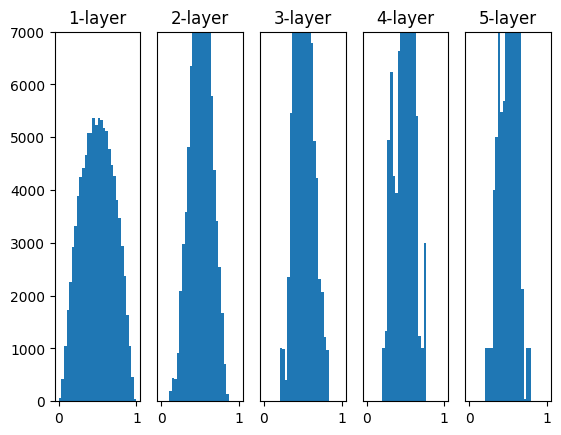

In [190]:
def f(node_num):
  return np.random.randn(node_num, node_num) / np.sqrt(node_num)

test_w_init(f)
plt.show()

이 문제는 활성화 함수를 sigmoid가 아닌 tanh으로 하였을때 해결할 수 있다.

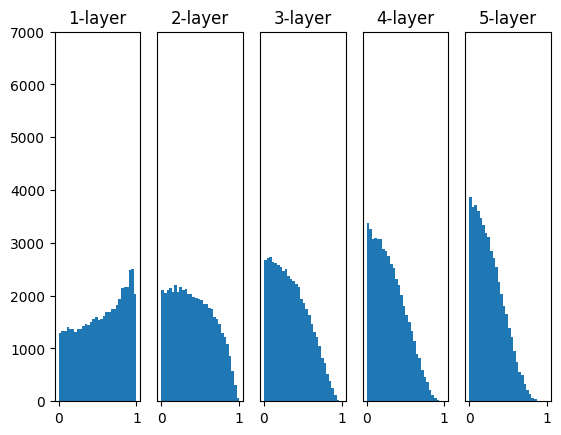

In [191]:
def tanh(x):
  return np.tanh(x)

def f(node_num):
  return np.random.randn(node_num, node_num) / np.sqrt(node_num)

test_w_init(f, h=tanh)
plt.show()

### He 초깃값
활성화 함수가 ReLU일때에는 He 초깃값 알고리즘을 통해 더 나은 분포를 보여줄 수 있다.

He 초깃값은 `sqrt(2/퍼셉트론_수)`의 표준 편차를 보이는 정규 분포로 다음과 같이 확인할 수 있다.

He는 다른 알고리즘과 달리 레이어가 깊어져도 고른 분포를 보여주기에 자주 사용된다.

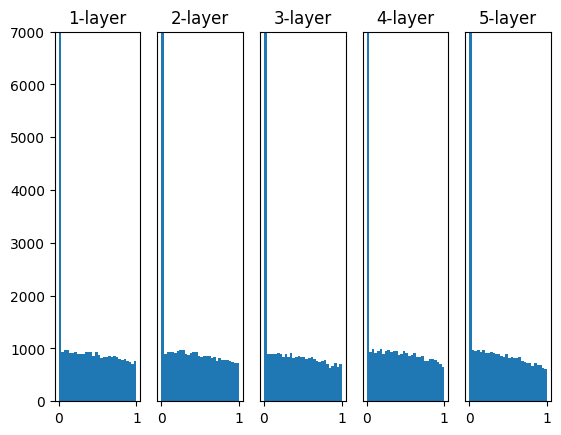

In [194]:
def f(node_num):
  return np.random.randn(node_num, node_num) * np.sqrt(2/node_num)

test_w_init(f, h=relu)
plt.show()

### 배치 정규화 알고리즘
초기값을 복잡하게 설정하지 말고 각 층에 출력값을 강제로 분포하도록 설정하면 어떻게 될까?

이런 생각에서 나온 알고리즘이 바로 배치 정규화 레이어이다.\
배치 정규화 레이어는 은닉층 퍼셉트론과 활성화 함수 사이, 혹은 활성화 함수 뒤에 넣을때 효과가 좋은것으로 알려져 있다.

배치 정규화 레이어는 다음과 같이 코드로 작성할 수 있으나 설명하기 어려우므로 코드만 표시한다.

In [ ]:
class BatchNormalization:
  """
  http://arxiv.org/abs/1502.03167
  """
  def __init__(self, gamma, beta, momentum=0.9, running_mean=None, running_var=None):
    self.gamma = gamma
    self.beta = beta
    self.momentum = momentum
    self.input_shape = None # 합성곱 계층은 4차원, 완전연결 계층은 2차원  

    # 시험할 때 사용할 평균과 분산
    self.running_mean = running_mean
    self.running_var = running_var  
    
    # backward 시에 사용할 중간 데이터
    self.batch_size = None
    self.xc = None
    self.std = None
    self.dgamma = None
    self.dbeta = None

  def forward(self, x, train_flg=True):
    self.input_shape = x.shape
    if x.ndim != 2:
      N, C, H, W = x.shape
      x = x.reshape(N, -1)

    out = self.__forward(x, train_flg)
      
    return out.reshape(*self.input_shape)
          
  def __forward(self, x, train_flg):
    if self.running_mean is None:
      N, D = x.shape
      self.running_mean = np.zeros(D)
      self.running_var = np.zeros(D)
                    
    if train_flg:
      mu = x.mean(axis=0)
      xc = x - mu
      var = np.mean(xc**2, axis=0)
      std = np.sqrt(var + 10e-7)
      xn = xc / std
      
      self.batch_size = x.shape[0]
      self.xc = xc
      self.xn = xn
      self.std = std
      self.running_mean = self.momentum * self.running_mean + (1-self.momentum) * mu
      self.running_var = self.momentum * self.running_var + (1-self.momentum) * var            
    else:
      xc = x - self.running_mean
      xn = xc / ((np.sqrt(self.running_var + 10e-7)))
        
    out = self.gamma * xn + self.beta 
    return out

  def backward(self, dout):
    if dout.ndim != 2:
      N, C, H, W = dout.shape
      dout = dout.reshape(N, -1)

    dx = self.__backward(dout)

    dx = dx.reshape(*self.input_shape)
    return dx

  def __backward(self, dout):
    dbeta = dout.sum(axis=0)
    dgamma = np.sum(self.xn * dout, axis=0)
    dxn = self.gamma * dout
    dxc = dxn / self.std
    dstd = -np.sum((dxn * self.xc) / (self.std * self.std), axis=0)
    dvar = 0.5 * dstd / self.std
    dxc += (2.0 / self.batch_size) * self.xc * dvar
    dmu = np.sum(dxc, axis=0)
    dx = dxc - dmu / self.batch_size
    
    self.dgamma = dgamma
    self.dbeta = dbeta
    
    return dx

배치 정규화는 가중치 초기값 설정 알고리즘을 선택할 필요도 없고 학습을 빠르게 진행시킬 수 있어 애용된다.

학습을 빠르게 진행시키는 이유는 손실 함수의 그래프를 다음과 같이 Smoothing하기 때문이다.

<img src="img/107651920-60991600-6cc3-11eb-9bea-697a3236b03d.PNG" width="600px">

## 오버핏 방지
오버핏은 모델이 트레이닝 데이터에 너무 최적화 되어 있어 테스트 데이터가 들어왔을때 유연하게 처리하지 못하는 문제를 말한다.

딥러닝에서 오버핏을 방지하는 것은 엔지니어에게 주요 과제라고 할 수 있다.\
자 그럼 오버핏을 방지하는 여러가지 알고리즘들을 알아보자.

### 가중치 감소
예전부터 많이 사용하던 가중치 감소 알고리즘을 알아보자

가중치 감소 알고리즘은 미분을 통해 가중치를 얼마나 조정해야 하는지 알아냈다면\
그 알아낸 가중치의 변경값을 적용하기 전에 L1, L2 ... Lp의 범위로 제한하여 너무 크게 적용되는 것을 막는다.

참고로 L1, L2 ... Lp의 범위를 시각화 하면 다음과 같다.

<img src="img/img.png" width="600px">

### Dropout
레이어가 너무 많아지면 가중치 감소 만으로 오버핏을 억제하기 어려울 수 있다.

그래서 레이어의 랜덤하게 퍼셉트론을 몇개 죽이는 방식을 사용하는 것을 Dropout이라 한다.\
퍼셉트론을 죽이는 방법은 간단하게 순전파때는 출력을 0으로 하고 역전파때는 기울기를 0으로 하는 것이다.

파이썬 코드로는 다음과 같이 작성할 수 있다.

In [195]:
class Dropout:
  """
  http://arxiv.org/abs/1207.0580
  """
  def __init__(self, dropout_ratio=0.5):
    self.dropout_ratio = dropout_ratio
    self.mask = None

  def forward(self, x, train_flg=True):
    if train_flg:
      self.mask = np.random.rand(*x.shape) > self.dropout_ratio
      return x * self.mask
    else:
      return x * (1.0 - self.dropout_ratio)

  def backward(self, dout):
    return dout * self.mask